Yekaalo Gebremeskel Python Exercise 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os
os.getcwd()
os.chdir(r"C:\Users\yekaa\Downloads")

Problem 3.1 and 3.2:

Load in Data

In [3]:
data = pd.read_excel('lab3_.xlsx')
data.head()

,Name,Ticker,Exchange,BE - Monthly 2004-12,Daily Closing Price 2004-12-31 USD,Market Cap - Monthly 2004-12,C/P - Daily 2004-12-31,E/P - Daily 2004-12-31,EBITDA/P- Daily 2004-12-31,FCF/P - Daily 2004-12-31,S/P - Daily 2004-12-31,Yearly Return Year 2005
0,21st Century Insurance Group,TW,"NEW YORK STOCK EXCHANGE, INC.",7.744003e+08,13.60,1.162532e+09,0.181592,0.072794,0.097625,NaN,1.161336,0.202298
1,3D Systems Corporation,DDD,"NEW YORK STOCK EXCHANGE, INC.",5.306520e+07,9.94,2.665461e+08,-0.003288,-0.027163,-0.010686,-0.005725,0.481346,-0.094567
2,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
3,"3PAR, Inc.",PAR,"NEW YORK STOCK EXCHANGE, INC.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7 Days Group Holdings Ltd ADR,SVN,"NEW YORK STOCK EXCHANGE, INC.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(3983, 12)

Drop NA values

In [5]:
data = data.dropna()
data.shape

(1484, 12)

Rename Columns

In [6]:
data = data.rename(columns = {'C/P - Daily 2004-12-31': 'C/P', 'E/P - Daily 2004-12-31': 'E/P', 'EBITDA/P- Daily 2004-12-31':'EBITDA/P', 
                              'FCF/P - Daily 2004-12-31': 'FCF/P', 'S/P - Daily 2004-12-31':'S/P', 'Yearly Return Year  2005':'Y_R',
                              'BE - Monthly 2004-12': 'BE', 'Daily Closing Price 2004-12-31 USD': 'Closing', 'Market Cap - Monthly 2004-12 ': 'Market Cap' })

In [7]:
data.head()

,Name,Ticker,Exchange,BE,Closing,Market Cap,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
1,3D Systems Corporation,DDD,"NEW YORK STOCK EXCHANGE, INC.",5.306520e+07,9.94,2.665461e+08,-0.003288,-0.027163,-0.010686,-0.005725,0.481346,-0.094567
2,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
5,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",4.644576e+08,23.95,2.704339e+09,0.187734,0.037996,0.051892,0.082927,4.161811,0.564509
6,99 Cents Only Stores,NDN,"NEW YORK STOCK EXCHANGE, INC.",4.882846e+08,16.16,1.123212e+09,0.074544,0.027228,0.071430,0.009231,0.822501,-0.352723
8,A.M. Castle & Co.,CAS,"NEW YORK STOCK EXCHANGE, INC.",1.190104e+08,11.94,1.886095e+08,0.083026,0.041039,0.177531,0.050787,3.515037,0.829145


Remove Outliers hat are 3 standard deviations 
away from their means. 

In [8]:
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

In [9]:
out = data[['C/P','E/P','EBITDA/P','FCF/P','S/P']]

#creating boolean df
outA = out.apply(is_out)

print('Outlier Boolean DF')
print(outA.head(2))
print('-------------')

print('Total Outliers')
print(outA.apply(sum))
print('-------------')
#creating boolean index
outB = outA.any(axis = 1)

print('Boolean Index')
print(outB.head(2))
print('-------------')
#remove all outliers
df = data[~outB]

print("Before and After Shapes")
print(data.shape)
print(df.shape)

#reseting index
df.reset_index(inplace = True, drop = True)
df.head(3)

Outlier Boolean DF
     C/P    E/P  EBITDA/P  FCF/P    S/P
1  False  False     False  False  False
2  False  False     False  False  False
-------------
Total Outliers
C/P         27
E/P          2
EBITDA/P    27
FCF/P       17
S/P         25
dtype: int64
-------------
Boolean Index
1    False
2    False
dtype: bool
-------------
Before and After Shapes
(1484, 12)
(1405, 12)


,Name,Ticker,Exchange,BE,Closing,Market Cap,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
0,3D Systems Corporation,DDD,"NEW YORK STOCK EXCHANGE, INC.",5.306520e+07,9.94,2.665461e+08,-0.003288,-0.027163,-0.010686,-0.005725,0.481346,-0.094567
1,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
2,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",4.644576e+08,23.95,2.704339e+09,0.187734,0.037996,0.051892,0.082927,4.161811,0.564509


In [10]:
df.shape

(1405, 12)

Problem 3.3:

Filter Data

In [11]:
data_filtered = df[(df['BE'] >0) & (df['Closing'] >5)& (df['Market Cap'] > 100000000)&(df['E/P'] >0)& (df['EBITDA/P']>0)]
data_filtered.shape

(1199, 12)

Problem 3.4:

Pairplot of independent variables

In [12]:
data_var = data_filtered.iloc[:,6:11]
data_var.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P
1,0.064421,0.043987,0.067516,0.051095,0.299432
2,0.187734,0.037996,0.051892,0.082927,4.161811
3,0.074544,0.027228,0.071430,0.009231,0.822501
4,0.083026,0.041039,0.177531,0.050787,3.515037
5,0.028270,0.049098,0.086150,-0.023465,1.801769


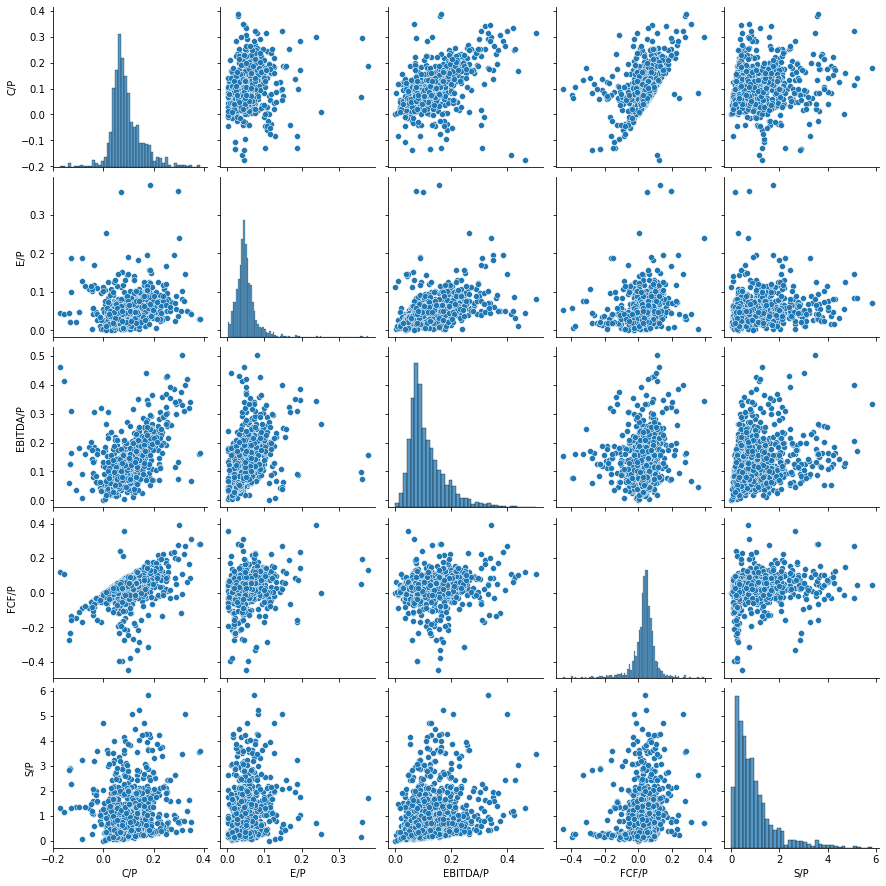

In [13]:
sns.pairplot(data_var)

Correlation of independent variables

In [14]:
corr = data_var.corr()
corr

,C/P,E/P,EBITDA/P,FCF/P,S/P
C/P,1.000000,0.249207,0.570486,0.447657,0.217926
E/P,0.249207,1.000000,0.416179,0.192060,0.214109
EBITDA/P,0.570486,0.416179,1.000000,0.092550,0.311550
FCF/P,0.447657,0.192060,0.092550,1.000000,0.129256
S/P,0.217926,0.214109,0.311550,0.129256,1.000000


As we can see, EBITDA/P and C/P have a strong correlation of 0.57, 
FCP/P and C/P also have a strong correlation of 0.45. EBITDA/P and E/P have also a strong correlation of 0.42. Other correlations are between 0.2 and 0.3

In [15]:
corr.iloc[:,:]>0.5

,C/P,E/P,EBITDA/P,FCF/P,S/P
C/P,True,False,True,False,False
E/P,False,True,False,False,False
EBITDA/P,True,False,True,False,False
FCF/P,False,False,False,True,False
S/P,False,False,False,False,True


Heatmap of independent variable correlation

<AxesSubplot:>

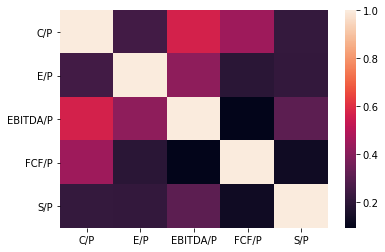

In [16]:
sns.heatmap(corr)

P-value of Independent Variables

In [17]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [18]:
corr_pval = data_var.corr(method=pearsonr_pval)
corr_pval

,C/P,E/P,EBITDA/P,FCF/P,S/P
C/P,1.000000e+00,1.974614e-18,1.858400e-104,3.808011e-60,2.346859e-14
E/P,1.974614e-18,1.000000e+00,2.015563e-51,2.000766e-11,6.722053e-14
EBITDA/P,1.858400e-104,2.015563e-51,1.000000e+00,1.335577e-03,2.122342e-28
FCF/P,3.808011e-60,2.000766e-11,1.335577e-03,1.000000e+00,7.126784e-06
S/P,2.346859e-14,6.722053e-14,2.122342e-28,7.126784e-06,1.000000e+00


As we test for the rejection or the non-rejection of the null hypothesis;
H0: r = 0

We are testing whether the pvalue is <5%, meaning we reject the null and there is correlation betweeen our variables, or >5% we cannot reject the null and there is no correlation betweeen our variables.

We can see that the independent variables have very low p-values lower than 0.05, which suggest a correlation between them and a rejection of the null hypothesis.

Problem 3.5:

Pairplot of relationship between the dependent variable and independent variables

In [19]:
data_exp = data_filtered.iloc[:,6:12]
data_exp.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
1,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
2,0.187734,0.037996,0.051892,0.082927,4.161811,0.564509
3,0.074544,0.027228,0.071430,0.009231,0.822501,-0.352723
4,0.083026,0.041039,0.177531,0.050787,3.515037,0.829145
5,0.028270,0.049098,0.086150,-0.023465,1.801769,0.198806


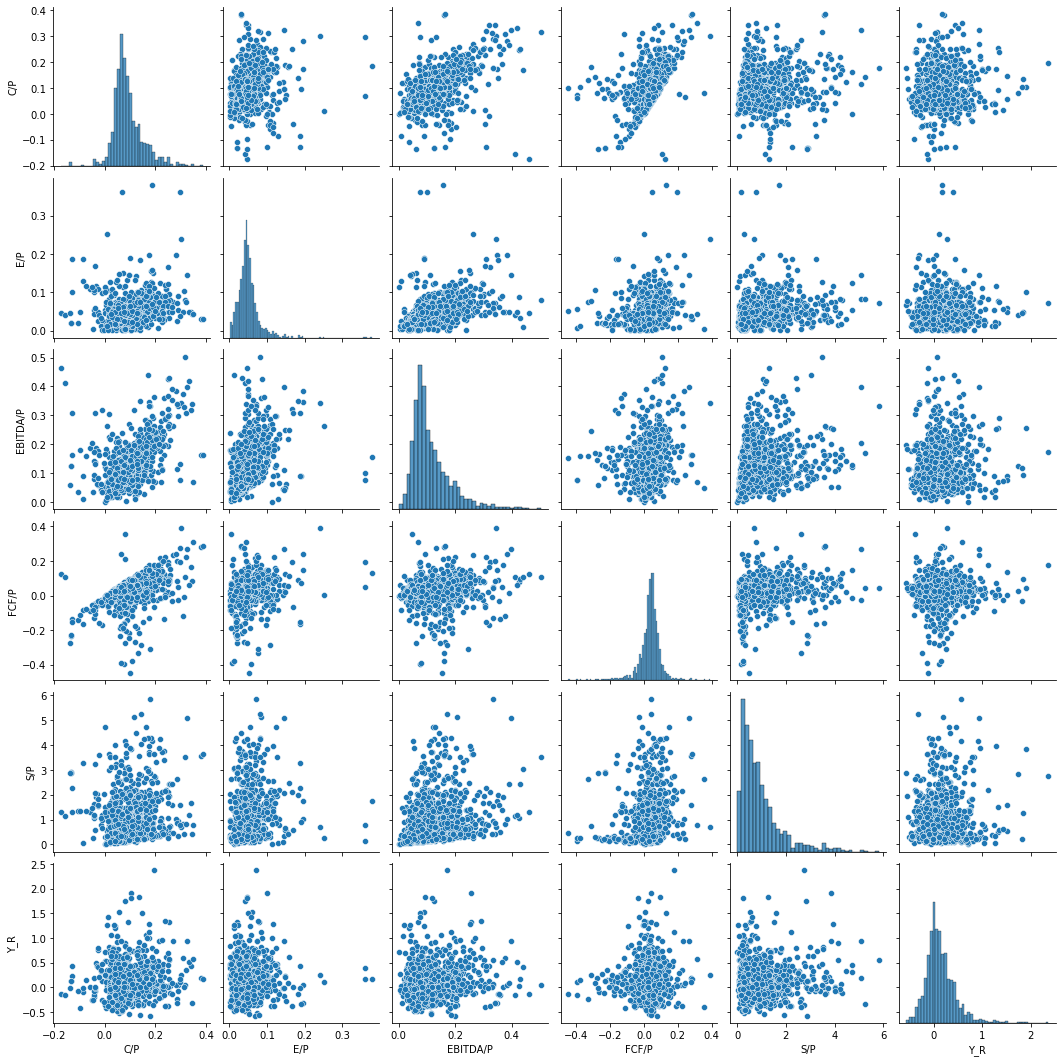

In [20]:
sns.pairplot(data_exp)

Correlation between the dependent variable and independent variables

In [21]:
corr_exp = data_exp.corr()
corr_exp

,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
C/P,1.000000,0.249207,0.570486,0.447657,0.217926,0.092076
E/P,0.249207,1.000000,0.416179,0.192060,0.214109,0.025284
EBITDA/P,0.570486,0.416179,1.000000,0.092550,0.311550,0.090501
FCF/P,0.447657,0.192060,0.092550,1.000000,0.129256,-0.001850
S/P,0.217926,0.214109,0.311550,0.129256,1.000000,0.071766
Y_R,0.092076,0.025284,0.090501,-0.001850,0.071766,1.000000


The correlation between the dependent variable and independent variables seems mostly positive except for Y_R and FCP/P which has a correlation of -0.00185. The highest correlation is from Y_R and C/P with 0.092

heatmap of correlation between the dependent variable and independent variables

<AxesSubplot:>

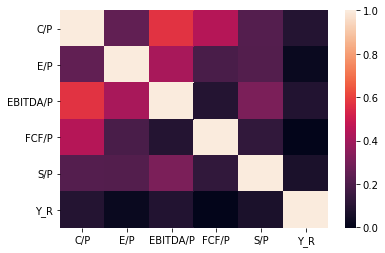

In [22]:
sns.heatmap(corr_exp)

P-value matrix between each pair of vairiable to test the hypothesis of no correlation between each pair of the variables 
against the alternative of significant correlation between each pair of the variables

In [38]:
corr_exp_pval = data_exp.corr(method=pearsonr_pval)
round(corr_exp_pval,5)

,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
C/P,1.00000,0.00000,0.00000,0.00000,0.00000,0.00141
E/P,0.00000,1.00000,0.00000,0.00000,0.00000,0.38173
EBITDA/P,0.00000,0.00000,1.00000,0.00134,0.00000,0.00171
FCF/P,0.00000,0.00000,0.00134,1.00000,0.00001,0.94899
S/P,0.00000,0.00000,0.00000,0.00001,1.00000,0.01293
Y_R,0.00141,0.38173,0.00171,0.94899,0.01293,1.00000


Looking at the P_values here:

P-value <0.05 : C /P, EBITDA/P, S/P = Reject the null(H0) = significant

P-value >0.05 : E/P, FCP/P = Cannot reject Null(H0) = insignificant


Problem 3.6:

z-scores  for  each  of  the explanatory  variables  and the  correlation  coefficients 
between  each  pair  of  the  explanatory  variables

In [24]:
from scipy.stats import zscore #scipy.stats has a zscore function
data_zscore = data_var.apply(zscore)
data_zscore

,C/P,E/P,EBITDA/P,FCF/P,S/P
1,-0.423584,-0.208379,-0.687073,0.233800,-0.751223
2,1.512349,-0.395446,-0.910940,0.685193,3.792239
3,-0.264664,-0.731675,-0.630993,-0.359830,-0.135917
4,-0.131494,-0.300439,0.889198,0.229434,3.031414
5,-0.991138,-0.048780,-0.420096,-0.823466,1.016033
...,...,...,...,...,...
1400,-0.411743,-0.123197,-0.482544,0.238022,-0.719442
1401,-1.078668,-0.243912,-0.537670,-1.036161,2.538479
1402,-0.261583,-0.019960,-0.496910,-0.109193,-0.377282
1403,-0.822353,-1.005060,-1.229971,-0.093253,-0.932421


In [25]:
data_zscore.corr()

,C/P,E/P,EBITDA/P,FCF/P,S/P
C/P,1.000000,0.249207,0.570486,0.447657,0.217926
E/P,0.249207,1.000000,0.416179,0.192060,0.214109
EBITDA/P,0.570486,0.416179,1.000000,0.092550,0.311550
FCF/P,0.447657,0.192060,0.092550,1.000000,0.129256
S/P,0.217926,0.214109,0.311550,0.129256,1.000000


We can see that nothing changed betweeen our answers 3.4. We have the same exact response working with the zscore

Aggregate the z-scores for the explanatory variables 

In [26]:
data_zscore['Agg'] = data_zscore.agg("mean", axis="columns")
data_zscore.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P,Agg
1,-0.423584,-0.208379,-0.687073,0.233800,-0.751223,-0.367292
2,1.512349,-0.395446,-0.910940,0.685193,3.792239,0.936679
3,-0.264664,-0.731675,-0.630993,-0.359830,-0.135917,-0.424616
4,-0.131494,-0.300439,0.889198,0.229434,3.031414,0.743623
5,-0.991138,-0.048780,-0.420096,-0.823466,1.016033,-0.253489


In [27]:
data_exp_zscore = data_exp.apply(zscore)
data_exp_zscore.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
1,-0.423584,-0.208379,-0.687073,0.233800,-0.751223,-0.534058
2,1.512349,-0.395446,-0.910940,0.685193,3.792239,1.378380
3,-0.264664,-0.731675,-0.630993,-0.359830,-0.135917,-1.547648
4,-0.131494,-0.300439,0.889198,0.229434,3.031414,2.222586
5,-0.991138,-0.048780,-0.420096,-0.823466,1.016033,0.211763


In [28]:
data_zscore['Y_R'] = data_exp_zscore['Y_R']
data_zscore.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P,Agg,Y_R
1,-0.423584,-0.208379,-0.687073,0.233800,-0.751223,-0.367292,-0.534058
2,1.512349,-0.395446,-0.910940,0.685193,3.792239,0.936679,1.378380
3,-0.264664,-0.731675,-0.630993,-0.359830,-0.135917,-0.424616,-1.547648
4,-0.131494,-0.300439,0.889198,0.229434,3.031414,0.743623,2.222586
5,-0.991138,-0.048780,-0.420096,-0.823466,1.016033,-0.253489,0.211763


In [29]:
data_exp_agg = data_zscore.drop(columns=['C/P','E/P','EBITDA/P','FCF/P','S/P'])
data_exp_agg.head()

,Agg,Y_R
1,-0.367292,-0.534058
2,0.936679,1.378380
3,-0.424616,-1.547648
4,0.743623,2.222586
5,-0.253489,0.211763


Correlation coefficient between the aggregated explanatory variables and the explained variable.

In [30]:
data_exp_agg.corr()

,Agg,Y_R
Agg,1.00000,0.08499
Y_R,0.08499,1.00000


We can see that the aggregated zscore for explanatory variabpes is positively correlated with the yearly returns. The correlation is at 0.085 which is pretty low. A regression model would help figure out which variables are insignificant and could possibly help us build a good model.

Problem 3.7:

Based on the correlation coefficient we can clearly see that there is multicollinearity in our work.
EBITDA/P is significantly correlated with three other variables, C/P, E/P and S/P. A suggestion to correct the multicollinearity would be to remove EBITDA/P

Problem 3.8:

If we run a regression that incorporates all of the 5 fundemental factors to explain the average returns for the next year we woul possibly run into an overfitting issue.
Generally, overfitting happens due to many reasons:
    - Training data is too small
    - Too much noise
    - Models adapts too well to noise

Our data contains some noise and insufficient amount of data to train on. We will likely encounter an issue of overfitting with our current data.

There are different ways to avoid overfitting:
    - Cross Validation
    - Sufficient Data
    - Regularization
    - Removing Noise


Bonus Linear Regression:

In [39]:
reg_data = data_filtered.iloc[:,6:12]
reg_data.head()

,C/P,E/P,EBITDA/P,FCF/P,S/P,Y_R
1,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
2,0.187734,0.037996,0.051892,0.082927,4.161811,0.564509
3,0.074544,0.027228,0.071430,0.009231,0.822501,-0.352723
4,0.083026,0.041039,0.177531,0.050787,3.515037,0.829145
5,0.028270,0.049098,0.086150,-0.023465,1.801769,0.198806


In [40]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import StandardScaler # data normalization


In [45]:
X = reg_data.drop(['Y_R'], axis=1)
y = reg_data.Y_R

In [42]:
X = StandardScaler().fit(X).transform(X)
X

array([[-0.42358371, -0.20837918, -0.68707305,  0.23380022, -0.75122256],
       [ 1.51234903, -0.395446  , -0.91094031,  0.68519321,  3.79223875],
       [-0.26466432, -0.73167511, -0.63099314, -0.35983023, -0.13591686],
       ...,
       [-0.26158285, -0.01995966, -0.49690981, -0.10919317, -0.37728235],
       [-0.82235264, -1.00505961, -1.22997078, -0.09325255, -0.9324215 ],
       [ 0.15648066,  0.45658012,  0.42711639,  0.28526653,  0.6118046 ]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
import statsmodels.api as st
X1 = st.add_constant(X)
lin_model=st.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.010   
Dependent Variable: Y_R              AIC:                615.3486
Date:               2023-02-14 12:21 BIC:                645.8841
No. Observations:   1199             Log-Likelihood:     -301.67 
Df Model:           5                F-statistic:        3.506   
Df Residuals:       1193             Prob (F-statistic): 0.00376 
R-squared:          0.014            Scale:              0.097330
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       0.0716     0.0208    3.4459   0.0006    0.0308   0.1123
C/P         0.4175     0.1973    2.1168   0.0345    0.0305   0.8045
E/P        -0.1233     0.3159   -0.3903   0.6964   -0.7431   0.4965
EBITDA/P    0.1611     0.1777    0.9066   0.3648   -0.1875   0.5096
FCF/P      -0

C:\Users\yekaa\anaconda3.0\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


By running a linear regression we can see that our model isn't good, the only significant variable in our regression model would be C/P and other have a p-value greater than 5% making them insignificant in our model.